# 6. Estudo de Caso: Matriz de correlação

In [71]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 6.1 Importando dados de Flls, ETFs e BDRs

In [72]:
ativos =['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGLG11.SA',
         'HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA', 'AAPL34.SA']

In [73]:
inicio = '2017-01-01'

In [74]:
precos_ativos = pd.DataFrame()

for i in ativos:
    precos_ativos[i] = yf.download(i, start = inicio)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [75]:
precos_ativos.head()

,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGLG11.SA,HGBS11.SA,SMAL11.SA,IVVB11.SA,AAPL34.SA
Date,,,,,,,,
2017-01-02,137.220779,91.424210,NaN,106.380798,196.671753,54.000000,74.25,8.866644
2017-01-03,137.133392,91.620811,NaN,106.380798,196.088760,55.450001,74.25,8.772817
2017-01-04,138.803635,91.620811,NaN,106.380798,195.797226,56.990002,74.25,8.742323
2017-01-05,138.861893,90.441154,NaN,106.380798,195.505737,56.990002,74.25,8.791582
2017-01-06,139.784393,90.441154,NaN,106.380798,196.283081,56.500000,74.25,8.840840


## 6.2. Importando dados de índices, commodities e criptomoedas

### 6.2.1 Índices

In [76]:
import investpy

In [77]:
# fazendo busca no ibov 'bvsp'

search_results =  investpy.search_quotes(text = 'bvsp', products =['indices'],
                     countries = ['brazil'], n_results = 10)

In [78]:
for search_result in search_results:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}
{"id_": 49632, "name": "Ibovespa USD", "symbol": "BVSPUSD", "country": "brazil", "tag": "/indices/ibovespa-usd", "pair_type": "indices", "exchange": "BM&FBovespa"}
{"id_": 49633, "name": "Ibovespa EUR", "symbol": "BVSPEUR", "country": "brazil", "tag": "/indices/ibovespa-eur", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [79]:
# pegando apenas o 1 resultado

for search_result in search_results[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [80]:
ibov = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date ='29/06/2022')

In [81]:
ibov.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,833730,-1.06
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65


In [82]:
# pesquisar no investing.com

search_results = investpy.search_quotes(text ='spx', 
                                       products = ['indices'],
                                       countries = ['united states'],
                                       n_results = 10)

# exibindo todos resultados

for search_result in  search_results:
    print(search_result)

{"id_": 166, "name": "S&P 500", "symbol": "US500", "country": "united states", "tag": "/indices/us-spx-500", "pair_type": "indices", "exchange": "NYSE"}
{"id_": 27643, "name": "S&P Transportation Select Industry", "symbol": "SPXSTN", "country": "united states", "tag": "/indices/s-p-transportation-select-industry", "pair_type": "indices", "exchange": "NYSE"}
{"id_": 942854, "name": "S&P 500 Daily Hedged EUR Net TR", "symbol": "SPXDHEN", "country": "united states", "tag": "/indices/s-p-500-daily-eur-hedged", "pair_type": "indices", "exchange": "NYSE"}
{"id_": 1010726, "name": "S&P 500 Value TR", "symbol": "SPXVTR", "country": "united states", "tag": "/indices/s-p-500-value-tr", "pair_type": "indices", "exchange": "NASDAQ"}
{"id_": 962671, "name": "S&P 500 Health Care", "symbol": "SPXHC", "country": "united states", "tag": "/indices/s-p-500-health-care", "pair_type": "indices", "exchange": "NYSE"}
{"id_": 27641, "name": "S&P Retail Select Industry", "symbol": "SPXSRE", "country": "united 

In [83]:
# pegando apenas o primeiro resultado

for search_result in search_results[:1]:
    print(search_result)

{"id_": 166, "name": "S&P 500", "symbol": "US500", "country": "united states", "tag": "/indices/us-spx-500", "pair_type": "indices", "exchange": "NYSE"}


In [84]:
sp500 = search_result.retrieve_historical_data(from_date ='01/01/2017',
                                              to_date = '29/06/2022')

In [85]:
sp500.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [86]:
# renomeando Close por Ibov

ibov.rename(columns = {'Close': 'IBOV'}, inplace = True)

In [87]:
ibov.head()

,Open,High,Low,IBOV,Volume,Change Pct
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,833730,-1.06
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65


In [88]:
# renomendo Close por sp500

sp500.rename(columns = {'Close': 'S&P500'}, inplace = True)

In [89]:
sp500.head()

,Open,High,Low,S&P500,Volume,Change Pct
Date,,,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [90]:
# juntanto ibov , sp500

indices = pd.merge(ibov, sp500, how ='inner', on = 'Date')

In [91]:
indices.head()

,Open_x,High_x,Low_x,IBOV,Volume_x,Change Pct_x,Open_y,High_y,Low_y,S&P500,Volume_y,Change Pct_y
Date,,,,,,,,,,,,
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,61680.0,62112.0,61307.0,61700.0,2557490,0.06,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [92]:
# selecionando apenas as colunas ibov e sp500

indices = indices[['IBOV','S&P500']]
indices.head()

,IBOV,S&P500
Date,,
2017-01-03,61814.0,2257.83
2017-01-04,61589.0,2270.75
2017-01-05,62071.0,2269.00
2017-01-06,61665.0,2276.98
2017-01-09,61700.0,2268.90


### 6.2.2. Commodities

In [93]:
# Café
search_results = investpy.search_quotes(text = 'coffe',
                                       products = ['commodities'],
                                       countries=['brazil'],
                                       n_results = 10)

for search_result in search_results:
    print(search_result)

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": null, "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181093, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc3", "country": null, "tag": "/commodities/arabica-coffee-4-5?cid=1181093", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181092, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc2", "country": null, "tag": "/commodities/arabica-coffee-4-5?cid=1181092", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [94]:
for search_result in search_results[:1]:
    print(search_result)

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": null, "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [95]:
cafe = search_result.retrieve_historical_data(from_date = '01/01/2017',
                                             to_date = '29/06/2022')

In [96]:
cafe.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00
2017-01-03,163.70,165.35,160.50,163.30,576,2.16
2017-01-04,163.70,170.00,163.55,168.95,376,3.46
2017-01-05,170.90,172.95,169.00,170.90,278,1.15
2017-01-06,170.95,173.10,170.00,171.00,452,0.06


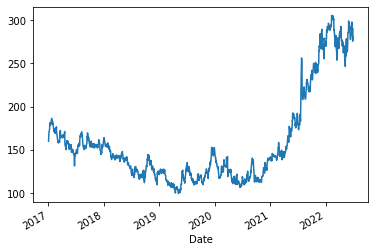

In [97]:
cafe.Close.plot()

In [98]:
cafe.rename(columns = {'Close': 'cafe'}, inplace = True)

In [99]:
cafe.head()

,Open,High,Low,cafe,Volume,Change Pct
Date,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00
2017-01-03,163.70,165.35,160.50,163.30,576,2.16
2017-01-04,163.70,170.00,163.55,168.95,376,3.46
2017-01-05,170.90,172.95,169.00,170.90,278,1.15
2017-01-06,170.95,173.10,170.00,171.00,452,0.06


In [100]:
# Soja

search_results = investpy.search_quotes(text ='soy', 
                                        products = ['commodities'],
                                       countries = ['brazil'],
                                       n_results = 10)
for search_result in search_results[:1]:
    print(search_result)

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [101]:

soja = search_result.retrieve_historical_data(from_date = '01/01/2017',
                                             to_date = '15/05/2022')

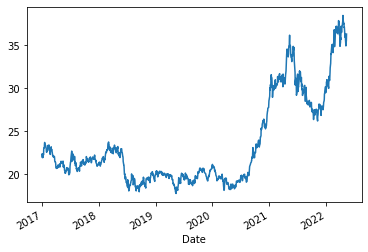

In [102]:
soja.Close.plot()

In [108]:
soja.rename(columns = {'Close': 'soja'}, inplace = True)


In [110]:
soja.head()

,Open,High,Low,soja,Volume,Change Pct
Date,,,,,,
2017-01-02,22.33,22.33,22.33,22.33,0,0.00
2017-01-03,22.05,22.06,21.95,21.94,130,-1.75
2017-01-04,21.99,22.33,21.99,22.38,159,2.01
2017-01-05,22.26,22.35,22.26,22.32,35,-0.27
2017-01-06,22.20,22.20,21.99,21.93,117,-1.75


In [103]:
# Etanol

search_results = investpy.search_quotes(text = 'ethanol',
                                       products = ['commodities'],
                                       countries = ['brazil'], 
                                       n_results = 10)
for search_result in search_results[:1]:
    print(search_result)

{"id_": 964525, "name": "Ethanol Futures", "symbol": "ETHc1", "country": null, "tag": "/commodities/ethanol-futures?cid=964525", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [104]:
etanol = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '29/06/2022')

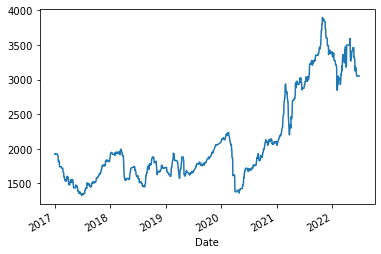

In [105]:
etanol.Close.plot()

In [111]:
etanol.rename(columns = {'Close': 'etanol'}, inplace = True)
etanol.head()

,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,
2017-01-02,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,1925.0,1925.0,1925.0,1925.0,150,0.00


In [113]:
# DataFrame intermediario 

interm = pd.merge(cafe,soja, how ='inner', on = 'Date')

# DataFrame commodities

commodities = pd.merge(interm, etanol, how = 'inner', on = 'Date')

In [116]:
commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [117]:
# Colocando mais de um dataframe 

from functools import reduce 

In [118]:
lista_dfs = [ cafe, soja, etanol]

In [119]:
# chamando uma função anonima  para juntar left, right 
# criando uma função anonima para a lista de dataFrame

commodities = reduce(lambda left, right: pd.merge(left, right, how ='inner', on = 'Date'), lista_dfs)

In [120]:
commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [121]:
commodities = commodities [['cafe','soja','etanol']]

In [122]:
# preço de fechamento de 3 commodities

commodities.head()

,cafe,soja,etanol
Date,,,
2017-01-02,159.85,22.33,1925.0
2017-01-03,163.30,21.94,1930.0
2017-01-04,168.95,22.38,1925.0
2017-01-05,170.90,22.32,1925.0
2017-01-06,171.00,21.93,1925.0


In [123]:
### 6.2.3 Criptomoedas

In [124]:
bitcoin = investpy.get_crypto_historical_data(crypto ='bitcoin', from_date ='01/01/2017', to_date ='15/05/2022')

In [125]:
bitcoin.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-01-01,963.4,1001.6,956.1,995.4,41149,USD
2017-01-02,995.4,1031.7,990.2,1017.0,64952,USD
2017-01-03,1017.0,1035.5,1006.5,1033.3,54788,USD
2017-01-04,1033.3,1148.5,1022.3,1135.4,156272,USD
2017-01-05,1135.4,1150.6,874.5,989.3,240008,USD


In [126]:
bitcoin.rename(columns = {'Close': 'bitcoin'}, inplace = True)

In [127]:
ethereum = investpy.get_crypto_historical_data(crypto ='ethereum',
                                             from_date ='01/01/2017', to_date ='15/05/2022')

ethereum.rename(columns ={'Close':'ethereum'}, inplace = True)

In [128]:
ethereum.head()

,Open,High,Low,ethereum,Volume,Currency
Date,,,,,,
2017-01-01,8.17,8.59,8.03,8.20,144921,USD
2017-01-02,8.19,8.50,8.11,8.37,101269,USD
2017-01-03,8.43,9.90,8.30,9.74,603421,USD
2017-01-04,9.57,11.10,9.44,11.00,556252,USD
2017-01-05,11.16,11.70,9.20,10.15,490641,USD


In [129]:
cripto = pd.merge(bitcoin, ethereum, how ='inner', on = 'Date')

In [130]:
cripto.head()

,Open_x,High_x,Low_x,bitcoin,Volume_x,Currency_x,Open_y,High_y,Low_y,ethereum,Volume_y,Currency_y
Date,,,,,,,,,,,,
2017-01-01,963.4,1001.6,956.1,995.4,41149,USD,8.17,8.59,8.03,8.20,144921,USD
2017-01-02,995.4,1031.7,990.2,1017.0,64952,USD,8.19,8.50,8.11,8.37,101269,USD
2017-01-03,1017.0,1035.5,1006.5,1033.3,54788,USD,8.43,9.90,8.30,9.74,603421,USD
2017-01-04,1033.3,1148.5,1022.3,1135.4,156272,USD,9.57,11.10,9.44,11.00,556252,USD
2017-01-05,1135.4,1150.6,874.5,989.3,240008,USD,11.16,11.70,9.20,10.15,490641,USD


In [131]:
cripto = cripto [['bitcoin', 'ethereum']]

In [132]:
cripto.head()

,bitcoin,ethereum
Date,,
2017-01-01,995.4,8.20
2017-01-02,1017.0,8.37
2017-01-03,1033.3,9.74
2017-01-04,1135.4,11.00
2017-01-05,989.3,10.15


### 6.3 Dados do dólar

In [133]:
dolar = yf.download('USDBRL=X', start = inicio)

[*********************100%***********************]  1 of 1 completed


In [134]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,3.2532,3.2797,3.2427,3.2532,3.2532,0
2017-01-03,3.2841,3.2897,3.2475,3.2840,3.2840,0
2017-01-04,3.2635,3.2643,3.2188,3.2635,3.2635,0
2017-01-05,3.2149,3.2276,3.1998,3.2141,3.2141,0
2017-01-06,3.1975,3.2118,3.1894,3.1977,3.1977,0


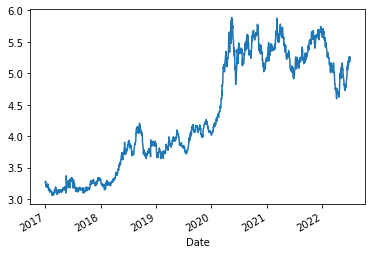

In [135]:
dolar.Close.plot()

In [137]:
# renomeando a estrutura e selecionando dataFrame

dolar =  pd.DataFrame(dolar.Close).rename(columns = {'Close':'Dolar'})

In [138]:
dolar.head()

,Dolar
Date,
2017-01-02,3.2532
2017-01-03,3.2840
2017-01-04,3.2635
2017-01-05,3.2141
2017-01-06,3.1977


## 6.4  Dados de ações

In [143]:
acoes = ['PETR4.SA','WEGE3.SA','MGLU3.SA','LREN3.SA','VALE3.SA','BPAC11.SA','OIBR3.SA']
data = yf.download(acoes, start='2019-01-01', end='2022-06-30')['Adj Close'] 
data.head()

[*********************100%***********************]  7 of 7 completed


,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773696,36.838821,5.641578,1.26,15.524001,39.107300,8.597388
2019-01-03,6.012529,36.373585,5.581216,1.41,15.904676,37.507492,8.793434
2019-01-04,6.225854,34.977837,5.411353,1.41,15.949845,39.949306,8.893848
2019-01-07,6.353385,34.174240,5.495374,1.42,16.201481,39.734982,8.755181
2019-01-08,6.235074,35.273922,5.451089,1.38,16.104696,40.117710,8.683457


## 6.5 Unificando os dataFrame em formas de data.

In [144]:
# Dados de ações
data.index = pd.to_datetime(data.index)
# Dados de FIIs, ETFs e BDRs
precos_ativos.index = pd.to_datetime(precos_ativos.index)
# Dados de indices
indices.index = pd.to_datetime(indices.index)
# Dados de commodities
commodities.index = pd.to_datetime(commodities.index)
# Dados de criptomoedas
cripto.index = pd.to_datetime(cripto.index)
# Cotação do dolar
dolar.index = pd.to_datetime(dolar.index)

In [145]:
dfs = [data, precos_ativos, indices, commodities, cripto, dolar]

In [146]:
df_final = reduce (lambda left, right: pd.merge(left, right, how ='inner', on = 'Date'),dfs)

In [147]:
df_final.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,5.773696,36.838821,5.641578,1.26,15.524001,39.107300,8.597388,145.954956,147.269745,NaN,...,74.25,14.617930,91012.0,2510.03,121.45,20.00,1730.0,3873.8,152.95,3.8799
2019-01-03,6.012529,36.373585,5.581216,1.41,15.904676,37.507492,8.793434,147.535553,147.269745,NaN,...,74.25,13.018450,91564.0,2447.89,124.95,20.12,1730.0,3780.1,146.94,3.7863
2019-01-04,6.225854,34.977837,5.411353,1.41,15.949845,39.949306,8.893848,147.653351,147.091858,NaN,...,74.25,13.226554,91841.0,2531.94,124.20,20.32,1730.0,3802.7,152.86,3.7551
2019-01-07,6.353385,34.174240,5.495374,1.42,16.201481,39.734982,8.755181,146.740341,142.327820,NaN,...,74.25,13.199936,91699.0,2549.69,124.35,20.38,1730.0,3985.9,149.96,3.6612
2019-01-08,6.235074,35.273922,5.451089,1.38,16.104696,40.117710,8.683457,146.956329,138.384140,NaN,...,74.25,13.596779,92032.0,2574.41,127.40,20.25,1690.0,3971.0,148.41,3.7341


In [148]:
# calculando os retornos

retornos = df_final.pct_change()

In [149]:
retornos.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.041366,-0.012629,-0.010699,0.119048,0.024522,-0.040908,0.022803,0.010829,0.000000,NaN,...,0.0,-0.109419,0.006065,-0.024757,0.028818,0.006000,0.000000,-0.024188,-0.039294,-0.024124
2019-01-04,0.035480,-0.038373,-0.030435,0.000000,0.002840,0.065102,0.011419,0.000798,-0.001208,NaN,...,0.0,0.015985,0.003025,0.034336,-0.006002,0.009940,0.000000,0.005979,0.040289,-0.008240
2019-01-07,0.020484,-0.022974,0.015527,0.007092,0.015777,-0.005365,-0.015591,-0.006183,-0.032388,NaN,...,0.0,-0.002012,-0.001546,0.007010,0.001208,0.002953,0.000000,0.048176,-0.018972,-0.025006
2019-01-08,-0.018622,0.032179,-0.008059,-0.028169,-0.005974,0.009632,-0.008192,0.001472,-0.027708,NaN,...,0.0,0.030064,0.003631,0.009695,0.024528,-0.006379,-0.023121,-0.003738,-0.010336,0.019912


In [150]:
retornos = retornos.dropna()

In [151]:
retornos.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-17,0.004810,-0.004128,0.059020,0.020000,-0.025352,0.012296,-0.045339,0.006935,-0.003031,0.00036,...,0.0,0.008984,-0.012269,-0.005163,0.004751,-0.018163,0.016176,-0.142749,-0.214982,0.004506
2019-07-18,-0.009232,0.007254,0.010680,-0.032680,-0.006142,-0.001898,0.009765,0.000328,-0.006622,0.00000,...,0.0,-0.001702,0.008290,0.003582,0.012608,0.000514,0.001447,0.095462,0.067694,-0.001433
2019-07-19,-0.012597,-0.029835,-0.036235,-0.033784,-0.002545,0.002472,0.001758,-0.000656,0.000816,-0.00036,...,0.0,-0.007870,-0.012080,-0.006177,-0.013230,0.023112,0.008671,-0.007501,-0.022821,-0.011803
2019-07-22,-0.015204,0.008483,0.039067,-0.006993,0.001822,-0.005122,-0.008337,0.000000,0.006389,0.00045,...,0.0,0.020624,0.004804,0.002829,-0.022082,-0.017068,0.000000,-0.015040,-0.012813,0.007667
2019-07-23,-0.006389,-0.021030,-0.021629,0.035211,0.001091,-0.013155,-0.000885,-0.001312,-0.009049,0.00027,...,0.0,0.016839,-0.002357,0.006848,-0.028629,-0.001021,0.020057,-0.050305,-0.024854,-0.001628


## 6.6. Matriz de Correlação

In [152]:
import seaborn as sns

C:\Users\JEFFERSON\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [153]:
import matplotlib.pyplot as plt

In [154]:
# Correlação ( trazendo valor entre 1 e -1)

df_final.corr()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
BPAC11.SA,1.000000,-0.211799,0.486284,0.164509,0.463398,0.885591,0.824562,-0.366271,-0.079973,0.361448,...,0.776636,0.796806,0.848896,0.853332,0.565275,0.791279,0.742117,0.753564,0.693547,0.543609
LREN3.SA,-0.211799,1.000000,0.362952,0.361937,-0.497762,-0.475218,-0.303945,0.773224,0.433775,0.340632,...,-0.599030,-0.605579,0.036695,-0.541376,-0.745285,-0.571909,-0.594250,-0.554440,-0.655081,-0.391686
MGLU3.SA,0.486284,0.362952,1.000000,0.639027,-0.426465,0.257835,0.658536,0.360099,-0.066590,0.701904,...,0.363209,0.282218,0.366626,0.135727,-0.329215,0.105270,-0.073577,0.149316,-0.087130,0.555964
OIBR3.SA,0.164509,0.361937,0.639027,1.000000,-0.247665,0.112721,0.291446,0.281564,-0.091793,0.766526,...,-0.019253,-0.042936,0.357586,-0.079716,-0.444395,0.049006,-0.234615,-0.003867,-0.244845,0.023033
PETR4.SA,0.463398,-0.497762,-0.426465,-0.247665,1.000000,0.582706,0.215158,-0.559711,0.141412,-0.134371,...,0.352144,0.512066,0.549961,0.669724,0.819437,0.679241,0.721163,0.500195,0.636398,-0.059074
VALE3.SA,0.885591,-0.475218,0.257835,0.112721,0.582706,1.000000,0.718252,-0.610145,-0.273618,0.277540,...,0.789568,0.800383,0.804704,0.887688,0.700032,0.942443,0.808711,0.845993,0.794166,0.468313
WEGE3.SA,0.824562,-0.303945,0.658536,0.291446,0.215158,0.718252,1.000000,-0.246112,-0.201199,0.478685,...,0.881158,0.869199,0.577684,0.755081,0.432634,0.655310,0.598337,0.706052,0.587150,0.811704
KNRI11.SA,-0.366271,0.773224,0.360099,0.281564,-0.559711,-0.610145,-0.246112,1.000000,0.550592,0.300248,...,-0.546804,-0.535834,-0.233247,-0.634731,-0.776675,-0.630166,-0.702220,-0.621661,-0.752167,-0.192328
ONEF11.SA,-0.079973,0.433775,-0.066590,-0.091793,0.141412,-0.273618,-0.201199,0.550592,1.000000,0.014303,...,-0.412228,-0.281758,0.066218,-0.241396,-0.173968,-0.175493,-0.176086,-0.327541,-0.335054,-0.357616
HCTR11.SA,0.361448,0.340632,0.701904,0.766526,-0.134371,0.277540,0.478685,0.300248,0.014303,1.000000,...,0.118130,0.117994,0.520768,0.113384,-0.294890,0.210111,-0.054761,0.201785,-0.080501,0.181088


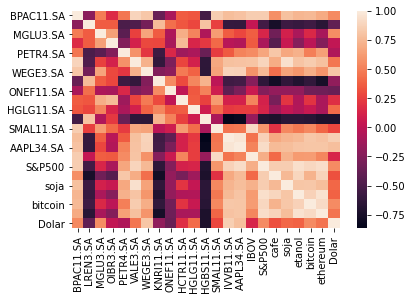

In [155]:
# mapa de calor

sns.heatmap(df_final.corr())

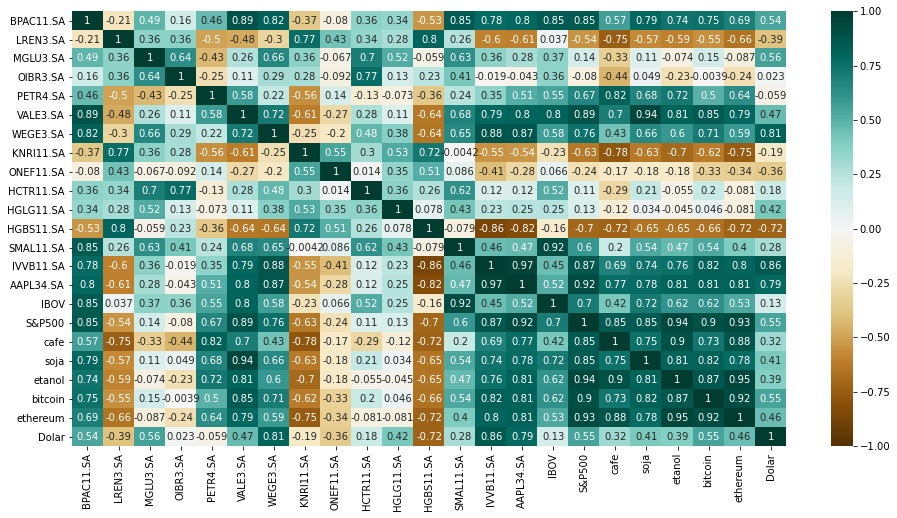

In [156]:
plt.figure(figsize = (16,8))

# determinando os parametros visuais

sns.heatmap(df_final.corr(),
           vmin = -1, vmax = 1,
           annot = True,
           cmap = 'BrBG')

# 7. Estudo de caso: comparação de carteira com o IBOV

Simplificação: simular um único aporte feito no primeiro dia

## 7.1 Importando dados

In [157]:
ativos = ['PETR4','VALE3','ABEV3','WEGE3','EMBR3','RADL3','CVCB3','CIEL3','OIBR3','KNRI11']

In [159]:
ativos = [i + '.SA' for i in ativos]

In [160]:
inicio = '2020-01-01'
fim = '2022-06-30'

In [161]:
df = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [162]:
df.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,17.917435,7.810122,44.709999,20.200001,195.954865,0.86,20.466219,22.584091,42.689384,17.114561
2020-01-03,17.665470,7.709877,44.200001,20.410000,195.954865,0.86,20.299559,22.080608,42.375092,16.896013
2020-01-06,17.749456,7.518497,43.820000,20.379999,194.364441,0.92,20.539551,21.645956,42.123653,16.939722
2020-01-07,17.786785,7.299777,44.400002,20.500000,195.120392,0.94,20.459553,21.348982,42.430092,17.070848
2020-01-08,17.702797,7.135736,44.340000,20.330000,184.075821,0.92,20.332888,21.634155,42.437946,16.424925


## 7.2 Normalização dos ativos

In [163]:
# normalizado na base 1
normalizado = df/df.iloc[0]

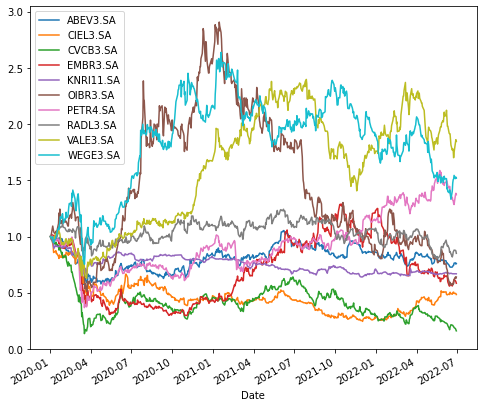

In [164]:
normalizado.plot(figsize = (8, 7))

## 7.3. Métricas básicas de carteira

Preços do dia do aport

In [165]:
primeiro = df.iloc[0]

In [166]:
primeiro

ABEV3.SA      17.917435
CIEL3.SA       7.810122
CVCB3.SA      44.709999
EMBR3.SA      20.200001
KNRI11.SA    195.954865
OIBR3.SA       0.860000
PETR4.SA      20.466219
RADL3.SA      22.584091
VALE3.SA      42.689384
WEGE3.SA      17.114561
Name: 2020-01-02 00:00:00, dtype: float64

Investindo $ 1000,00 em cada papel, quantos papéis precisariamos comprar de cada

In [167]:
comprados = 1000/primeiro

In [168]:
comprados

ABEV3.SA       55.811561
CIEL3.SA      128.038973
CVCB3.SA       22.366361
EMBR3.SA       49.504949
KNRI11.SA       5.103216
OIBR3.SA     1162.790678
PETR4.SA       48.861004
RADL3.SA       44.278957
VALE3.SA       23.425027
WEGE3.SA       58.429778
Name: 2020-01-02 00:00:00, dtype: float64

### Número de papéis arredondados

In [169]:
round(comprados, 0)

ABEV3.SA       56.0
CIEL3.SA      128.0
CVCB3.SA       22.0
EMBR3.SA       50.0
KNRI11.SA       5.0
OIBR3.SA     1163.0
PETR4.SA       49.0
RADL3.SA       44.0
VALE3.SA       23.0
WEGE3.SA       58.0
Name: 2020-01-02 00:00:00, dtype: float64

In [170]:
comprados = round(comprados, 0)

In [171]:
comprados

ABEV3.SA       56.0
CIEL3.SA      128.0
CVCB3.SA       22.0
EMBR3.SA       50.0
KNRI11.SA       5.0
OIBR3.SA     1163.0
PETR4.SA       49.0
RADL3.SA       44.0
VALE3.SA       23.0
WEGE3.SA       58.0
Name: 2020-01-02 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Calculando o valor que tinhamos em cada papel, por dia. Multiplicar o número de papéis comprados com os preços diários.

In [172]:
# patrimonio liquido

PL = df*comprados

In [173]:
PL.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,1003.376343,999.695618,983.619980,1010.000038,979.774323,1000.180017,1002.844728,993.700012,981.855843,992.644543
2020-01-03,989.266327,986.864258,972.400017,1020.499992,979.774323,1000.180017,994.678373,971.546768,974.627106,979.968769
2020-01-06,993.969559,962.367554,964.039993,1018.999958,971.822205,1069.960019,1006.437988,952.422066,968.844028,982.503880
2020-01-07,996.059967,934.371460,976.800034,1025.000000,975.601959,1093.219997,1002.518085,939.355202,975.892113,990.109211
2020-01-08,991.356628,913.374268,975.480003,1016.499996,920.379105,1069.960019,996.311495,951.902832,976.072765,952.645641


In [174]:
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2022-06-23,746.479996,505.600006,195.360003,607.999992,655.749969,581.500000,1298.009989,865.039993,1669.799965,1500.321102
2022-06-24,765.520004,494.079987,187.220005,625.000000,655.000000,616.389967,1288.210045,873.400017,1716.260063,1532.168842
2022-06-27,768.320015,494.079987,178.419992,612.500000,655.599976,639.650014,1371.019978,871.639977,1795.150070,1503.940018
2022-06-28,757.120026,492.799988,169.399996,604.500008,655.449982,628.020025,1388.169996,866.360023,1827.349930,1516.699978
2022-06-29,762.159981,483.839996,158.620001,590.500021,655.000000,639.650014,1375.919996,845.239960,1812.170021,1509.740040


### Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia.

In [176]:
PL['PL Total'] = PL.sum(axis=1)

In [177]:
PL.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2020-01-02,1003.376343,999.695618,983.619980,1010.000038,979.774323,1000.180017,1002.844728,993.700012,981.855843,992.644543,9947.691444
2020-01-03,989.266327,986.864258,972.400017,1020.499992,979.774323,1000.180017,994.678373,971.546768,974.627106,979.968769,9869.805949
2020-01-06,993.969559,962.367554,964.039993,1018.999958,971.822205,1069.960019,1006.437988,952.422066,968.844028,982.503880,9891.367250
2020-01-07,996.059967,934.371460,976.800034,1025.000000,975.601959,1093.219997,1002.518085,939.355202,975.892113,990.109211,9908.928028
2020-01-08,991.356628,913.374268,975.480003,1016.499996,920.379105,1069.960019,996.311495,951.902832,976.072765,952.645641,9763.982753


In [178]:
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2022-06-23,746.479996,505.600006,195.360003,607.999992,655.749969,581.500000,1298.009989,865.039993,1669.799965,1500.321102,8625.861015
2022-06-24,765.520004,494.079987,187.220005,625.000000,655.000000,616.389967,1288.210045,873.400017,1716.260063,1532.168842,8753.248930
2022-06-27,768.320015,494.079987,178.419992,612.500000,655.599976,639.650014,1371.019978,871.639977,1795.150070,1503.940018,8890.320025
2022-06-28,757.120026,492.799988,169.399996,604.500008,655.449982,628.020025,1388.169996,866.360023,1827.349930,1516.699978,8905.869951
2022-06-29,762.159981,483.839996,158.620001,590.500021,655.000000,639.650014,1375.919996,845.239960,1812.170021,1509.740040,8832.840030


Obter os dados do IBOV para compará-lo com a carteira

In [179]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [180]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


In [182]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [183]:
ibov = ibov[['Ibov']]

In [184]:
ibov

,Ibov
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
...,...
2022-06-23,98080.0
2022-06-24,98672.0
2022-06-27,100764.0


Unificando os dados das tabelas do IBOV e da carteira

In [185]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [186]:
novo_df.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,1003.376343,999.695618,983.619980,1010.000038,979.774323,1000.180017,1002.844728,993.700012,981.855843,992.644543,9947.691444
2020-01-03,117707.0,989.266327,986.864258,972.400017,1020.499992,979.774323,1000.180017,994.678373,971.546768,974.627106,979.968769,9869.805949
2020-01-06,116878.0,993.969559,962.367554,964.039993,1018.999958,971.822205,1069.960019,1006.437988,952.422066,968.844028,982.503880,9891.367250
2020-01-07,116662.0,996.059967,934.371460,976.800034,1025.000000,975.601959,1093.219997,1002.518085,939.355202,975.892113,990.109211,9908.928028
2020-01-08,116247.0,991.356628,913.374268,975.480003,1016.499996,920.379105,1069.960019,996.311495,951.902832,976.072765,952.645641,9763.982753


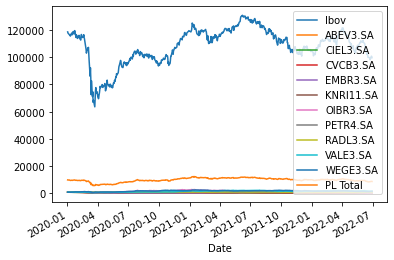

In [187]:
# plot sem normalizar

novo_df.plot()

# Normalizando, colocando na mesma base,  ou seja, onde todos começam com 100



In [188]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [189]:
novo_normalizado

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.269648,98.593746,98.716473,98.859319,101.039599,100.000000,100.000000,99.185681,97.770631,99.263768,98.723030,99.217050
2020-01-06,98.570501,99.062487,96.266057,98.009395,100.891081,99.188372,106.976744,100.358307,95.846035,98.674773,98.978419,99.433796
2020-01-07,98.388335,99.270824,93.465595,99.306648,101.485145,99.574151,109.302323,99.967428,94.531065,99.392606,99.744588,99.610328
2020-01-08,98.038339,98.802073,91.365237,99.172447,100.643560,93.937867,106.976744,99.348530,95.793783,99.411005,95.970471,98.153253
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,82.716976,74.396810,50.575395,19.861329,60.198017,66.928675,58.139534,129.432798,87.052429,170.065695,151.143842,86.712189
2022-06-24,83.216247,76.294404,49.423042,19.033774,61.881186,66.852130,61.627903,128.455583,87.893731,174.797561,154.352215,87.992767
2022-06-27,84.980560,76.573463,49.423042,18.139118,60.643562,66.913366,63.953489,136.713086,87.716611,182.832346,151.508415,89.370685


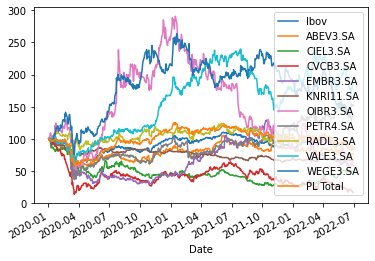

In [190]:
novo_normalizado.plot()

In [191]:
# ver o valor de hoje

novo_normalizado.tail()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-06-23,82.716976,74.396810,50.575395,19.861329,60.198017,66.928675,58.139534,129.432798,87.052429,170.065695,151.143842,86.712189
2022-06-24,83.216247,76.294404,49.423042,19.033774,61.881186,66.852130,61.627903,128.455583,87.893731,174.797561,154.352215,87.992767
2022-06-27,84.980560,76.573463,49.423042,18.139118,60.643562,66.913366,63.953489,136.713086,87.716611,182.832346,151.508415,89.370685
2022-06-28,84.834659,75.457233,49.295003,17.222098,59.851484,66.898057,62.790699,138.423223,87.185268,186.111835,152.793867,89.527002
2022-06-29,84.017441,75.959533,48.398731,16.126147,58.465346,66.852130,63.953489,137.201698,85.059872,184.565793,152.092715,88.792863


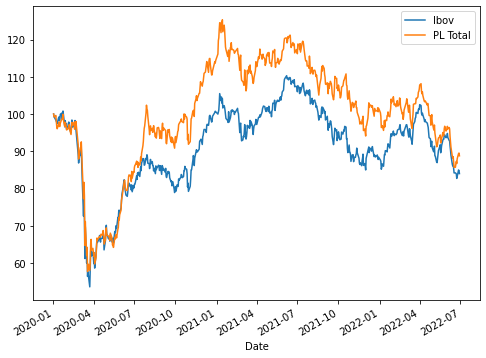

In [192]:
novo_normalizado[['Ibov','PL Total']].plot(figsize =(8,6))

### Simulando quando o usuário consegue determinar o valor investido em cada ativo

In [193]:
ativos

['PETR4.SA',
 'VALE3.SA',
 'ABEV3.SA',
 'WEGE3.SA',
 'EMBR3.SA',
 'RADL3.SA',
 'CVCB3.SA',
 'CIEL3.SA',
 'OIBR3.SA',
 'KNRI11.SA']

In [228]:
# colocando cada valor que vai adquirir

alocacoes = {'PETR4.SA':2000,
            'VALE3.SA': 2000, 
            'ABEV3.SA': 2000,
            'WEGE3.SA': 500,
            'EMBR3.SA': 500,
            'RADL3.SA': 500,
            'CVCB3.SA': 500,
            'CIEL3.SA': 500,
            'OIBR3.SA': 500,
            'KNRI11.SA':1000}

In [229]:
alocacoes

{'PETR4.SA': 2000,
 'VALE3.SA': 2000,
 'ABEV3.SA': 2000,
 'WEGE3.SA': 500,
 'EMBR3.SA': 500,
 'RADL3.SA': 500,
 'CVCB3.SA': 500,
 'CIEL3.SA': 500,
 'OIBR3.SA': 500,
 'KNRI11.SA': 1000}

In [230]:
alocacoes.keys()

dict_keys(['PETR4.SA', 'VALE3.SA', 'ABEV3.SA', 'WEGE3.SA', 'EMBR3.SA', 'RADL3.SA', 'CVCB3.SA', 'CIEL3.SA', 'OIBR3.SA', 'KNRI11.SA'])

In [231]:
# transformando os dados em dataFrames

alocacoes_df = pd.Series(data = alocacoes, index = list(alocacoes.keys()))

In [232]:
alocacoes.values()

dict_values([2000, 2000, 2000, 500, 500, 500, 500, 500, 500, 1000])

In [233]:
# soma total dos investimentos

sum(alocacoes.values())

10000

Obtendo preços dos ativos no primeiro dia do investimento

In [234]:
primeiro = df.iloc[0]

Quantidade de papéis comprados de cada ativo ( determinandos no primeiro dia)

In [235]:
# quantidade de papeis comprados no primeiro dia
compras = alocacoes_df/primeiro

In [236]:
primeiro

ABEV3.SA      17.917435
CIEL3.SA       7.810122
CVCB3.SA      44.709999
EMBR3.SA      20.200001
KNRI11.SA    195.954865
OIBR3.SA       0.860000
PETR4.SA      20.466219
RADL3.SA      22.584091
VALE3.SA      42.689384
WEGE3.SA      17.114561
Name: 2020-01-02 00:00:00, dtype: float64

In [237]:
compras = round(compras, 0)

In [238]:
compras

ABEV3.SA     112.0
CIEL3.SA      64.0
CVCB3.SA      11.0
EMBR3.SA      25.0
KNRI11.SA      5.0
OIBR3.SA     581.0
PETR4.SA      98.0
RADL3.SA      22.0
VALE3.SA      47.0
WEGE3.SA      29.0
dtype: float64

Criando uma dataframe que contém a posição diária de cada ativo

In [239]:
PL02 = df*compras

In [240]:
PL02.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,2006.752686,499.847809,491.809990,505.000019,979.774323,499.660008,2005.689457,496.850006,2006.401070,496.322271
2020-01-03,1978.532654,493.432129,486.200008,510.249996,979.774323,499.660008,1989.356747,485.773384,1991.629303,489.984385
2020-01-06,1987.939117,481.183777,482.019997,509.499979,971.822205,534.520010,2012.875977,476.211033,1979.811710,491.251940
2020-01-07,1992.119934,467.185730,488.400017,512.500000,975.601959,546.139999,2005.036171,469.677601,1994.214317,495.054605
2020-01-08,1982.713257,456.687134,487.740002,508.249998,920.379105,534.520010,1992.622990,475.951416,1994.583477,476.322821


In [241]:
PL02['PL Total'] = PL02.sum(axis = 1)

In [242]:
novo_df02 = pd.merge(ibov, PL02, how = 'inner', on ='Date')

In [243]:
novo_df02.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,2006.752686,499.847809,491.809990,505.000019,979.774323,499.660008,2005.689457,496.850006,2006.401070,496.322271,9988.107638
2020-01-03,117707.0,1978.532654,493.432129,486.200008,510.249996,979.774323,499.660008,1989.356747,485.773384,1991.629303,489.984385,9904.592936
2020-01-06,116878.0,1987.939117,481.183777,482.019997,509.499979,971.822205,534.520010,2012.875977,476.211033,1979.811710,491.251940,9927.135744
2020-01-07,116662.0,1992.119934,467.185730,488.400017,512.500000,975.601959,546.139999,2005.036171,469.677601,1994.214317,495.054605,9945.930333
2020-01-08,116247.0,1982.713257,456.687134,487.740002,508.249998,920.379105,534.520010,1992.622990,475.951416,1994.583477,476.322821,9829.770208


In [245]:
novo_normalizado_02 = (novo_df02/novo_df02.iloc[0])*100

In [246]:
novo_normalizado_02.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.269648,98.593746,98.716473,98.859319,101.039599,100.000000,100.000000,99.185681,97.770631,99.263768,98.723030,99.163859
2020-01-06,98.570501,99.062487,96.266057,98.009395,100.891081,99.188372,106.976744,100.358307,95.846035,98.674773,98.978419,99.389555
2020-01-07,98.388335,99.270824,93.465595,99.306648,101.485145,99.574151,109.302323,99.967428,94.531065,99.392606,99.744588,99.577725
2020-01-08,98.038339,98.802073,91.365237,99.172447,100.643560,93.937867,106.976744,99.348530,95.793783,99.411005,95.970471,98.414740


In [247]:
novo_normalizado_02.tail()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-06-23,82.716976,74.396810,50.575395,19.861329,60.198017,66.928675,58.139534,129.432798,87.052429,170.065695,151.143842,102.968358
2022-06-24,83.216247,76.294404,49.423042,19.033774,61.881186,66.852130,61.627903,128.455583,87.893731,174.797561,154.352215,104.458873
2022-06-27,84.980560,76.573463,49.423042,18.139118,60.643562,66.913366,63.953489,136.713086,87.716611,182.832346,151.508415,107.652725
2022-06-28,84.834659,75.457233,49.295003,17.222098,59.851484,66.898057,62.790699,138.423223,87.185268,186.111835,152.793867,108.316813
2022-06-29,84.017441,75.959533,48.398731,16.126147,58.465346,66.852130,63.953489,137.201698,85.059872,184.565793,152.092715,107.606069


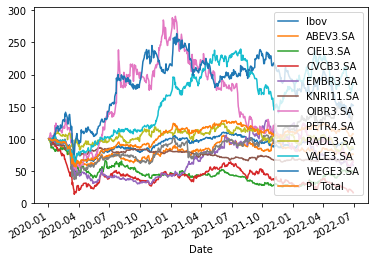

In [248]:
novo_normalizado_02.plot()

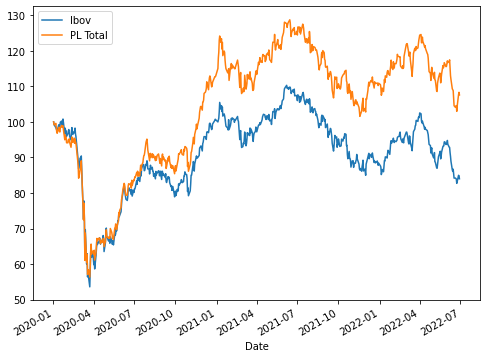

In [249]:
novo_normalizado_02[['Ibov','PL Total']].plot(figsize = (8,6))

**Exercício** 

Criar uma função que recebe um dicionário de alocações definido pelo usuário, e compara essa carteira com o Ibov. As datas de início e fim também devem ser definidas pelo usuário.

In [250]:
alocacoes = {'PETR4.SA':2000,
            'VALE3.SA': 2000, 
            'ABEV3.SA': 1000}

In [252]:
ativos = ['PETR4.SA','VALE3.SA','ABEV3.SA']

In [278]:
def compara_carteiras(ativos, dicionario, inicio, fim):
    df = yf.download(ativos, start = inicio, end = fim)['Adj Close']
    alocacoes_df = pd.Series(data = dicionario,
                            index = list(dicionario.keys()))
    primeiro = df.iloc[0]
    compras = alocacoes_df/primeiro
    compras = round(compras, 0)
    PL00 = df*compras
    PL00['PL Total'] = PL00.sum(axis = 1)
    ibov = yf.download('^BVSP', start = inicio, end = fim)
    ibov.rename(columns ={'Close':'Ibov'}, inplace = True)
    novo_df00 = pd.merge(ibov, PL00, how = 'inner', on = 'Date')
    novo_normalizando_00 = (novo_df00/novo_df00.iloc[0])*100
    novo_normalizando_00[['Ibov','PL Total']].plot(figsize = (8, 6))

In [274]:
inicio

'2020-01-01'

In [275]:
fim

'2022-06-30'

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


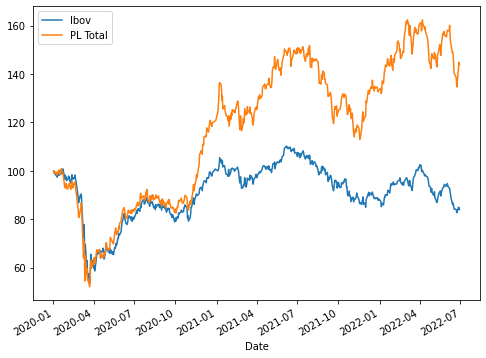

In [279]:
compara_carteiras(ativos, alocacoes, inicio, fim)

In [280]:
# comparando outras carteiras

lista_ativos = ['PETR4.SA','MGLU3.SA','WEGE3.SA']

carteira = {'PETR4.SA':2000,
           'MGLU3.SA':3000,
           'WEGE3.SA':13000}

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


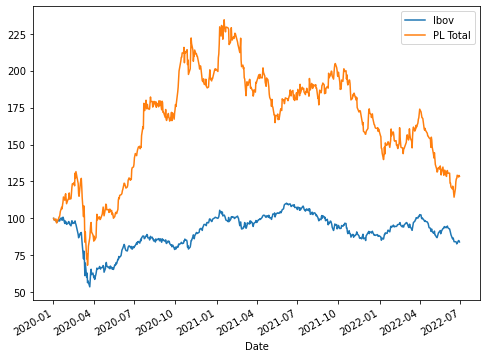

In [281]:
compara_carteiras(lista_ativos, carteira, inicio, fim)